# Social_Network_ads Learning Project:

In this, we are going to create an Naive Bayes model that directly predicts wheather a customer is going to purchase a product or not based on the age and estimated salary.

Naive bayes uses conditional probability concept for model prediction.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Getting data

In [2]:
df=pd.read_csv('Social_Network_Ads.csv') 

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


@@ Advt motive>>purchase when clicked @@

# Exploratory Data Analysis

Firstly,checking for null values in the dataset.

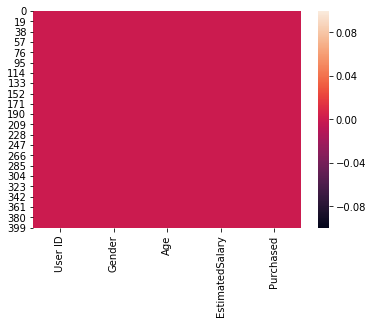

In [5]:
sns.heatmap(df.isnull())

Here we can see that there is no null values for the given dataset.

In [6]:
df.drop('User ID',axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Checking Correlation

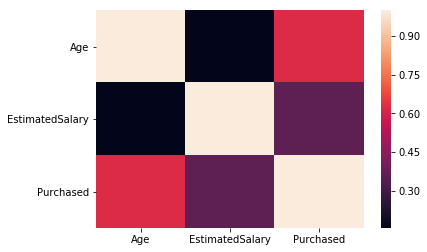

In [8]:
sns.heatmap(df.corr())

Here we can see that Gender column is not shown in Correlation. Hence we need to convert it into numbers by using get_dummies 

In [9]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [10]:
df.drop('Gender', axis=1, inplace=True)

In [11]:
df=pd.concat([df,gender],axis=1)

In [12]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


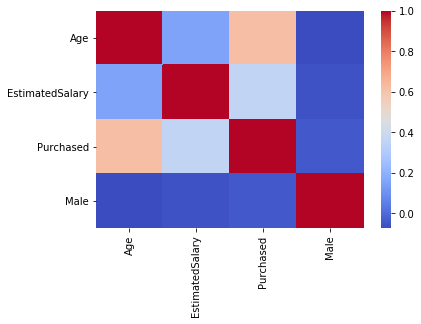

In [14]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [15]:
df.drop('Male', axis=1, inplace=True)

In [16]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64


## Standardize the Variables

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the classifier, than variables that are on a small scale.


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

In [20]:
scaled_array=ss.fit_transform(df.drop('Purchased', axis=1))

In [21]:
scaled_array.shape

(400, 2)

In [22]:
df.columns[:-1]

Index(['Age', 'EstimatedSalary'], dtype='object')

In [23]:
X=pd.DataFrame(data=scaled_array, columns=df.columns[:-1])

In [24]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [25]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
y=df['Purchased']

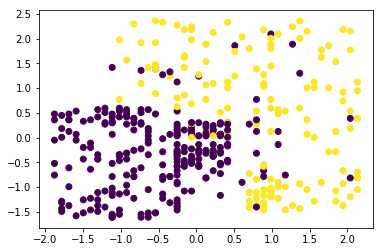

In [27]:
plt.scatter(scaled_array[:,0], scaled_array[:,1],c=y)

Here we dont know which color signifies what!!

In [28]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [29]:
narr = df.values

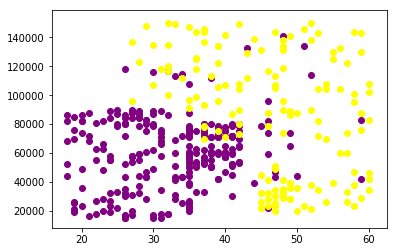

In [30]:
plt.scatter(narr[y==0,0], narr[y==0,1], color= 'Purple')       
plt.scatter(narr[y==1,0], narr[y==1,1], color= 'Yellow')       

By using Fancy Indexing, we get to know that Purple signifies for 0th value of y while Yellow signifies for 1st value of y.

## Training and testing the data

Split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 160 to 371
Data columns (total 2 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 110 to 203
Data columns (total 2 columns):
Age                120 non-null float64
EstimatedSalary    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


## Creating and Training the Model

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
cl= GaussianNB()

In [37]:
cl.fit(X_train,y_train)

GaussianNB(priors=None)

In [38]:
ypred=cl.predict(X_test)

# Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(ypred,y_test)

array([[65, 10],
       [ 7, 38]], dtype=int64)

In [41]:
from sklearn import metrics

In [42]:
metrics.mean_absolute_error(y_test, ypred)

0.14166666666666666

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(y_test,ypred)

'             precision    recall  f1-score   support\n\n          0       0.87      0.90      0.88        72\n          1       0.84      0.79      0.82        48\n\navg / total       0.86      0.86      0.86       120\n'

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,ypred)

0.8583333333333333

Also, Accuracy score is quite good!